<a href="https://colab.research.google.com/github/2348536/Machine_Learning/blob/main/AML_lab2_prgrm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
df=pd.read_csv('/content/Program_2_Dataset.csv')

In [35]:
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [36]:
# Select the predictors and target variable
X = df[['Avg_rooms ', 'Distance', 'Property_TaxRate', 'Non_Retail_Acres']]
y = df['MValue']

In [38]:
# Calculate VIF for each predictor
vif_factors = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [39]:
# Print VIF factors for each predictor
for i, vif in enumerate(vif_factors):
    print(f"VIF for {X.columns[i]}: {vif}")

VIF for Avg_rooms : 16.74796468070197
VIF for Distance: 6.880606903412825
VIF for Property_TaxRate: 13.861510476253434
VIF for Non_Retail_Acres: 9.598374007368621


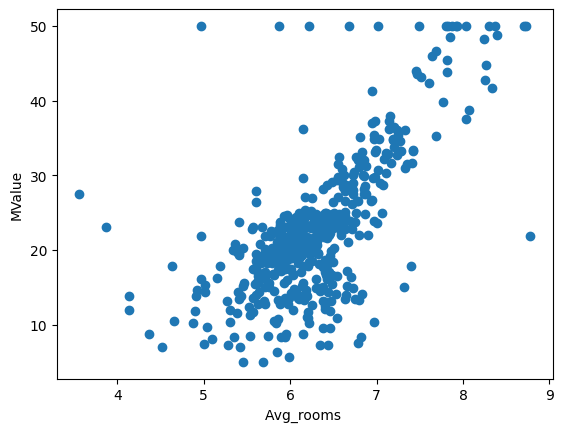

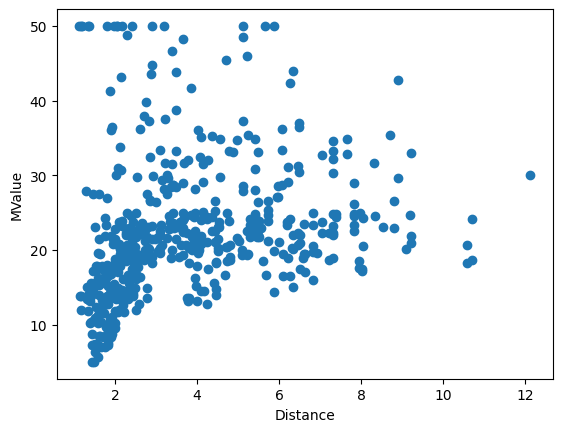

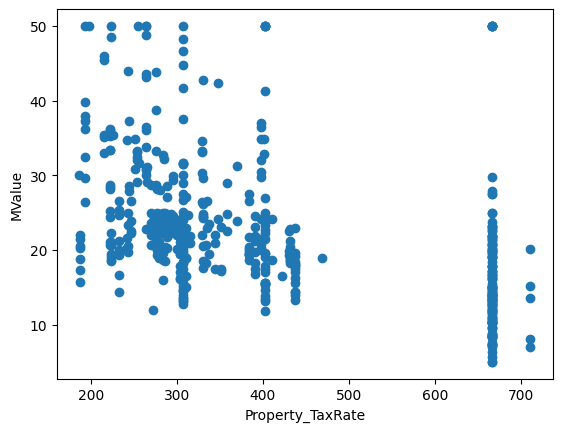

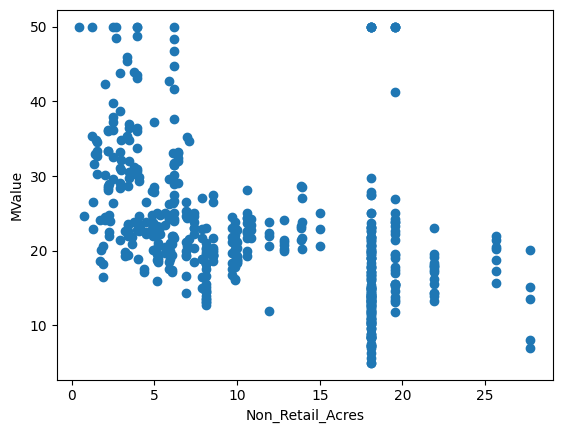

In [40]:
import matplotlib.pyplot as plt

# Create scatter plots for each predictor
for col in X.columns:
    plt.scatter(X[col], y)
    plt.xlabel(col)
    plt.ylabel('MValue')
    plt.show()

In [41]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [43]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [ 7.71823295 -0.65291673 -0.01373718 -0.21258162]
Intercept: -15.332210810746496


In [44]:
# Evaluate the model on the training data
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Evaluate the model on the testing data
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the results
print('Mean Squared Error (Training):', mse_train)
print('R-squared (Training):', r2_train)
print('Mean Squared Error (Testing):', mse_test)
print('R-squared (Testing):', r2_test)

NameError: ignored

NameError: ignored

Based on the VIF factors, it is evident that 'Distance', 'Property_TaxRate', and 'Non_Retail_Acres' have acceptable VIF values, indicating that they are not highly correlated with each other and can be included in the model.
The coefficients of the model indicate the direction and strength of the relationship between each predictor and the target